# Compare Models

In [3]:
%matplotlib inline
import numpy as np
from vessel_scoring import data
from vessel_scoring.evaluate_model import train_model, compare_auc, compare_metrics
from IPython.core.display import display, HTML
from sklearn import metrics

In [4]:
_, train_lline,  _, test_lline = data.load_dataset_by_vessel('datasets/kristina_longliner.measures.npz')
_, train_trawl,  _, test_trawl = data.load_dataset_by_vessel('datasets/kristina_trawl.measures.npz')
_, train_pseine, _, test_pseine = data.load_dataset_by_vessel('datasets/kristina_ps.measures.npz')

train = np.concatenate([train_trawl, train_lline, train_pseine])

In [5]:
from vessel_scoring.legacy_heuristic_model import LegacyHeuristicModel
from vessel_scoring.logistic_model import LogisticModel

uniform_training_data = dict([('longliner', train), ('trawler', train), ('purse seiner', train)])
per_gear_type_training_data = dict([('longliner', train_lline), 
                                    ('trawler', train_trawl), ('purse seiner', train_pseine)])
test_data = {'longliner': test_lline, 'trawler': test_trawl, 'purse seiner': test_pseine}

untrained_models = [
    ("Legacy (12 Hour)", LegacyHeuristicModel(window=43200), 
         uniform_training_data),
    ('Logistic (MW)', LogisticModel(windows=[1800, 3600, 10800, 21600, 43200, 86400], order=6), 
         uniform_training_data),
    ('Logistic per Gear Type (MW)', LogisticModel(windows=[1800, 3600, 10800, 21600, 43200, 86400], order=6),
        per_gear_type_training_data)
]


In [7]:
import imp, vessel_scoring.evaluate_model; imp.reload(vessel_scoring.evaluate_model)
from vessel_scoring.evaluate_model import train_model, compare_auc, compare_metrics



for vessel_class in ["longliner", "trawler", "purse seiner"]:
    display(HTML("<h1>Comparison for {0}</h1>".format(vessel_class)))
    models = []
    for name, mdl, train_data in untrained_models:
        models.append((name, train_model(mdl, train_data[vessel_class])))
    compare_metrics(models, test_data[vessel_class])

Legacy (12 Hour)
             precision    recall  f1-score   support

      False       0.68      0.80      0.73      1165
       True       0.94      0.88      0.91      3835

avg / total       0.88      0.86      0.87      5000

Logistic (MW)
             precision    recall  f1-score   support

      False       0.54      0.95      0.69      1165
       True       0.98      0.75      0.85      3835

avg / total       0.88      0.80      0.81      5000

Logistic per Gear Type (MW)
             precision    recall  f1-score   support

      False       0.75      0.92      0.82      1165
       True       0.97      0.90      0.94      3835

avg / total       0.92      0.91      0.91      5000



Legacy (12 Hour)
             precision    recall  f1-score   support

      False       0.96      0.53      0.68      2133
       True       0.74      0.99      0.84      2867

avg / total       0.83      0.79      0.77      5000

Logistic (MW)
             precision    recall  f1-score   support

      False       0.93      0.84      0.88      2133
       True       0.89      0.95      0.92      2867

avg / total       0.91      0.91      0.90      5000

Logistic per Gear Type (MW)
             precision    recall  f1-score   support

      False       0.91      0.85      0.88      2133
       True       0.89      0.94      0.92      2867

avg / total       0.90      0.90      0.90      5000



Legacy (12 Hour)
             precision    recall  f1-score   support

      False       1.00      0.21      0.34      4814
       True       0.05      0.98      0.09       186

avg / total       0.96      0.24      0.33      5000

Logistic (MW)
             precision    recall  f1-score   support

      False       1.00      0.69      0.81      4814
       True       0.10      0.92      0.18       186

avg / total       0.96      0.70      0.79      5000

Logistic per Gear Type (MW)
             precision    recall  f1-score   support

      False       1.00      0.74      0.85      4814
       True       0.12      0.91      0.21       186

avg / total       0.96      0.74      0.82      5000



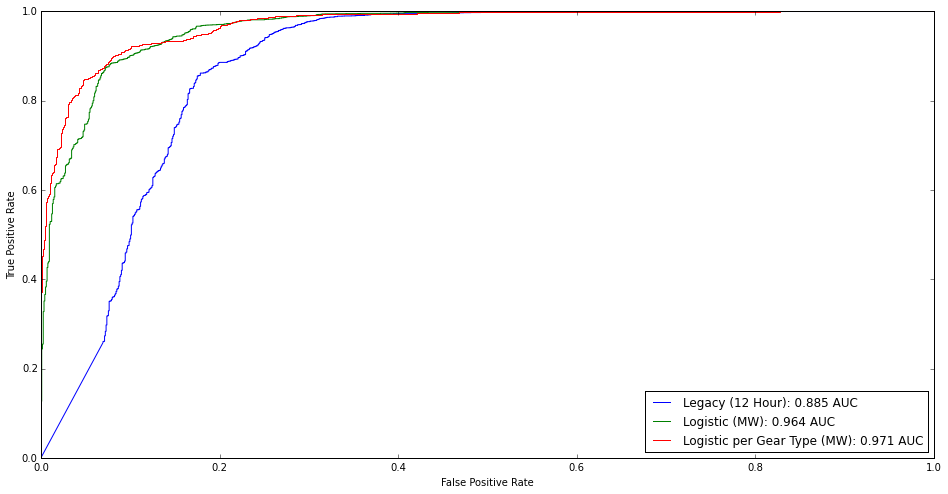

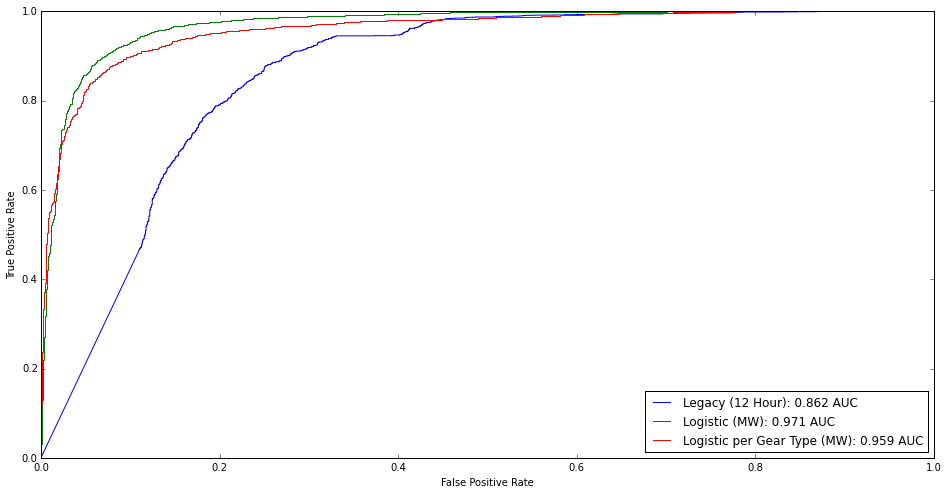

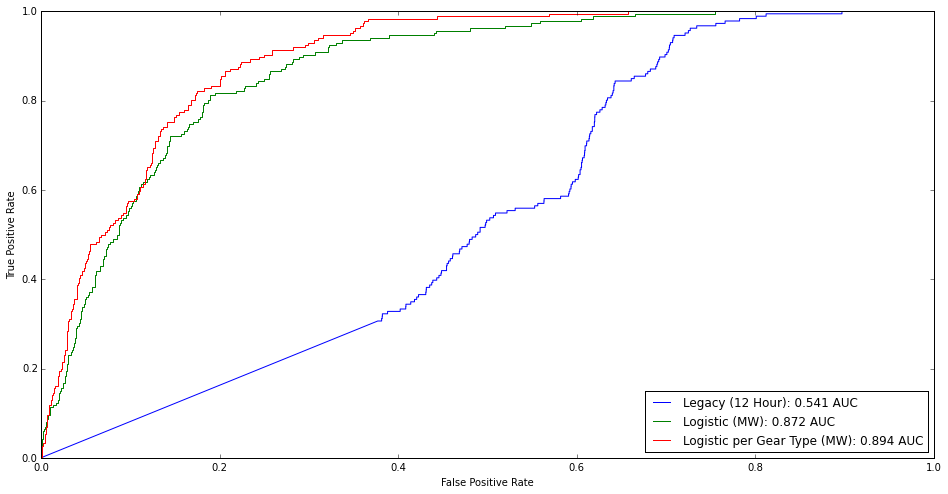

In [8]:
for vessel_class in ["longliner", "trawler", "purse seiner"]:
    display(HTML("<h1>Comparison for {0}</h1>".format(vessel_class)))
    models = []
    for name, mdl, train_data in untrained_models:
        models.append((name, train_model(mdl, train_data[vessel_class])))
    compare_auc(models, test_data[vessel_class])